In [142]:
# load EADA data
import pandas as pd
import numpy as np
EADA_df = pd.read_csv('EADA.csv')
EADA_df.head()

,Survey Year,UNITID,OPE ID,Institution Name,State CD,Classification Name,Classification Other,Sanction Code,Sanction Name,Male Undergraduates,...,Total Revenues Men's Team/Women's Team and Coed Team,Expenses Men's Team,Expenses Women's Team,Total Expenses Men's Team and Women's Team,Expenses Men Coed Team,Expenses Women Coed Team,Total Expenses Men Coed Team and Women Coed Team,Total Expenses Men's Team and Men Coed Team,Total Expenses Women's Team and Women Coed Team,Total Expenses Men's Team/Women's Team and Coed Team
0,2022,222178,353700,Abilene Christian University,TX,2,NaN,1,NCAA,1163,...,4051219,2322034.0,1773173.0,4095207,NaN,NaN,NaN,2322034,1773173,4095207
1,2022,108232,753100,Academy of Art University,CA,5,NaN,1,NCAA,1016,...,1734558,915320.0,819238.0,1734558,NaN,NaN,NaN,915320,819238,1734558
2,2022,126182,134500,Adams State University,CO,4,NaN,1,NCAA,584,...,940608,474307.0,466301.0,940608,NaN,NaN,NaN,474307,466301,940608
3,2022,188429,266600,Adelphi University,NY,5,NaN,1,NCAA,1531,...,1499347,822216.0,677131.0,1499347,NaN,NaN,NaN,822216,677131,1499347
4,2022,168528,223400,Adrian College,MI,6,NaN,1,NCAA,903,...,236830,111925.0,124905.0,236830,NaN,NaN,NaN,111925,124905,236830


In [143]:
# drop unnecessary columns
EADA_df = EADA_df[["Survey Year", "Institution Name", "Classification Name", "Sanction Name", "Revenues Men's Team"]]
EADA_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12818 entries, 0 to 12817
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Survey Year          12818 non-null  int64  
 1   Institution Name     12818 non-null  object 
 2   Classification Name  12818 non-null  int64  
 3   Sanction Name        12818 non-null  object 
 4   Revenues Men's Team  12693 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 500.8+ KB


In [144]:
# only include programs that are NCAA Division 1
EADA_df = EADA_df[EADA_df['Sanction Name'] == 'NCAA']
EADA_df = EADA_df[EADA_df['Classification Name'].isin([1,2,3])]
EADA_df.info() # no null values




<class 'pandas.core.frame.DataFrame'>
Index: 3462 entries, 0 to 12817
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Survey Year          3462 non-null   int64  
 1   Institution Name     3462 non-null   object 
 2   Classification Name  3462 non-null   int64  
 3   Sanction Name        3462 non-null   object 
 4   Revenues Men's Team  3462 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 162.3+ KB


In [145]:
EADA_df.head()

,Survey Year,Institution Name,Classification Name,Sanction Name,Revenues Men's Team
0,2022,Abilene Christian University,2,NCAA,2458334.0
5,2022,Alabama A & M University,2,NCAA,1196804.0
6,2022,Alabama State University,2,NCAA,1068356.0
11,2022,Alcorn State University,2,NCAA,749038.0
20,2022,American University,3,NCAA,2656602.0


In [146]:
teams = EADA_df['Institution Name'].unique()
years = EADA_df['Survey Year'].unique()

# count the number of unique teams 
print(len(teams))
print(len(years))

# only include teams that have been in divison 1 for all 10 years
EADA_df = EADA_df.groupby('Institution Name').filter(lambda x: len(x) == len(teams))



374
10


In [147]:

# load performance metric data
metrics_df = pd.read_csv('cbb.csv')
metrics_df.head()


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [148]:
# EADA file with standardized team names
EADA_df = pd.read_csv('EADA_cleaned.csv')
EADA_df.head()

,Survey Year,Institution Name,Match,Classification Name,Sanction Name,Revenues Men's Team
0,2022,Abilene Christian University,Abilene Christian,2,NCAA,2458334
1,2021,Abilene Christian University,Abilene Christian,2,NCAA,2853797
2,2020,Abilene Christian University,Abilene Christian,2,NCAA,1737429
3,2019,Abilene Christian University,Abilene Christian,2,NCAA,1604471
4,2018,Abilene Christian University,Abilene Christian,2,NCAA,1178426


In [149]:
# merge/join EADA and metrics dataframes on team name and year
df = pd.merge(metrics_df, EADA_df, how='inner', left_on=['TEAM', 'YEAR'], right_on=['Match', 'Survey Year'])
df.head()





,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,WAB,POSTSEASON,SEED,YEAR,Survey Year,Institution Name,Match,Classification Name,Sanction Name,Revenues Men's Team
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,8.6,2ND,1.0,2016,2016,University of North Carolina at Chapel Hill,North Carolina,1,NCAA,21408475
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,11.3,2ND,1.0,2015,2015,University of Wisconsin-Madison,Wisconsin,1,NCAA,22808750
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,6.9,2ND,3.0,2018,2018,University of Michigan-Ann Arbor,Michigan,1,NCAA,21114322
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,7.0,2ND,3.0,2019,2019,Texas Tech University,Texas Tech,1,NCAA,12123903
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,7.7,2ND,1.0,2017,2017,Gonzaga University,Gonzaga,3,NCAA,14723219


In [150]:
# drop unnecessary columns and only include potential features
df = df[['TEAM', 'CONF', 'G', 'W', 'POSTSEASON', 'YEAR', "Revenues Men's Team"]]
df.head()

,TEAM,CONF,G,W,POSTSEASON,YEAR,Revenues Men's Team
0,North Carolina,ACC,40,33,2ND,2016,21408475
1,Wisconsin,B10,40,36,2ND,2015,22808750
2,Michigan,B10,40,33,2ND,2018,21114322
3,Texas Tech,B12,38,31,2ND,2019,12123903
4,Gonzaga,WCC,39,37,2ND,2017,14723219


In [151]:
df.info()

# replace null values in POSTSEASON with 'Missed Tournament'
df['POSTSEASON'] = df['POSTSEASON'].fillna('Missed Tournament')
df['POSTSEASON'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2791 entries, 0 to 2790
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   TEAM                 2791 non-null   object
 1   CONF                 2791 non-null   object
 2   G                    2791 non-null   int64 
 3   W                    2791 non-null   int64 
 4   POSTSEASON           561 non-null    object
 5   YEAR                 2791 non-null   int64 
 6   Revenues Men's Team  2791 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 152.8+ KB


POSTSEASON
Missed Tournament    2230
R64                   264
R32                   130
S16                    69
E8                     36
R68                    27
F4                     17
2ND                     9
Champions               9
Name: count, dtype: int64

In [152]:
# create a new column for the win percentage 
df['Win Percentage'] = df['W'] / df['G']

df.head()

,TEAM,CONF,G,W,POSTSEASON,YEAR,Revenues Men's Team,Win Percentage
0,North Carolina,ACC,40,33,2ND,2016,21408475,0.825000
1,Wisconsin,B10,40,36,2ND,2015,22808750,0.900000
2,Michigan,B10,40,33,2ND,2018,21114322,0.825000
3,Texas Tech,B12,38,31,2ND,2019,12123903,0.815789
4,Gonzaga,WCC,39,37,2ND,2017,14723219,0.948718


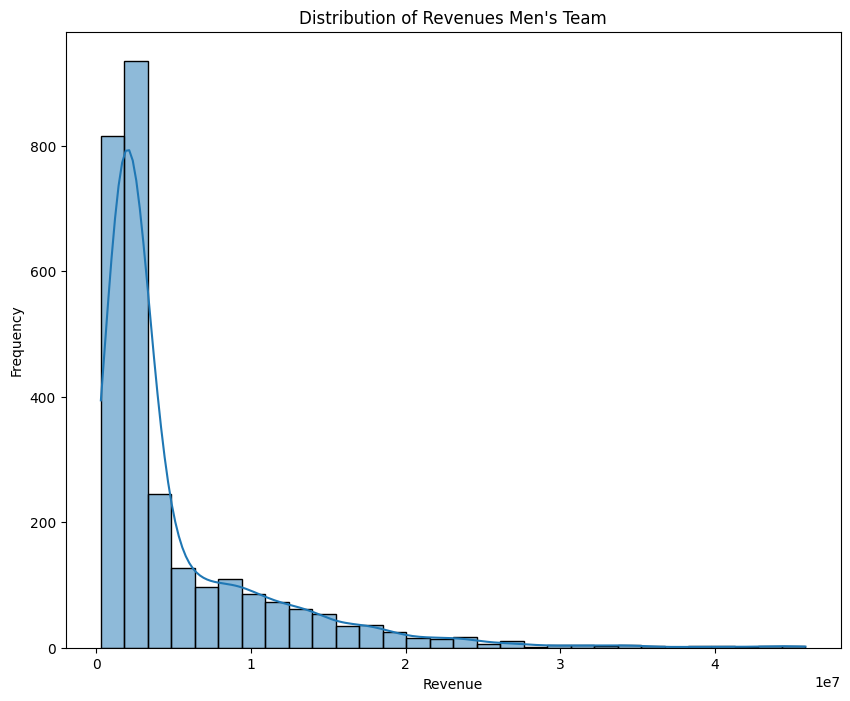

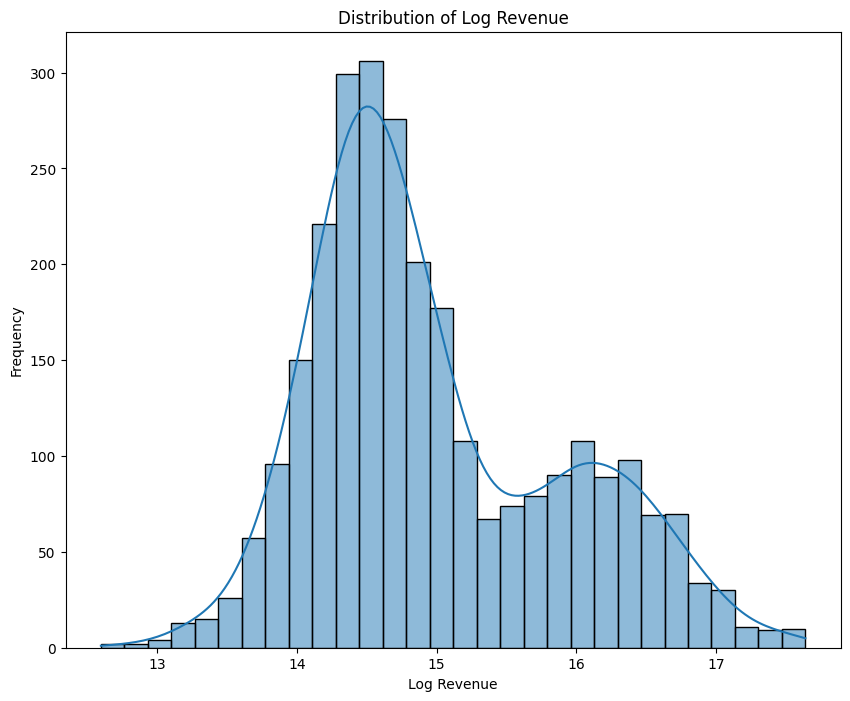

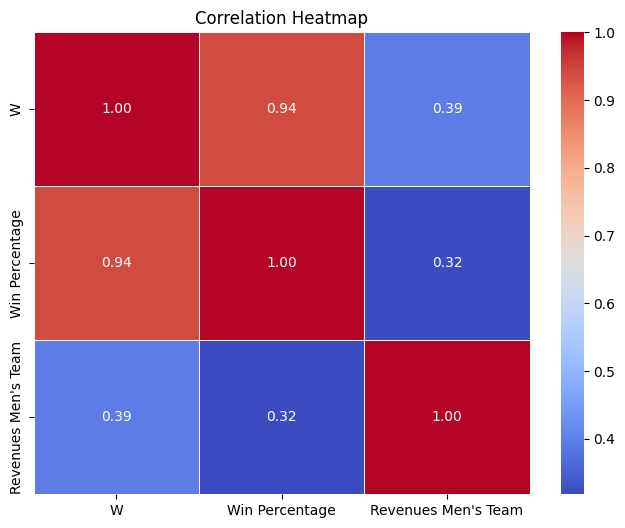

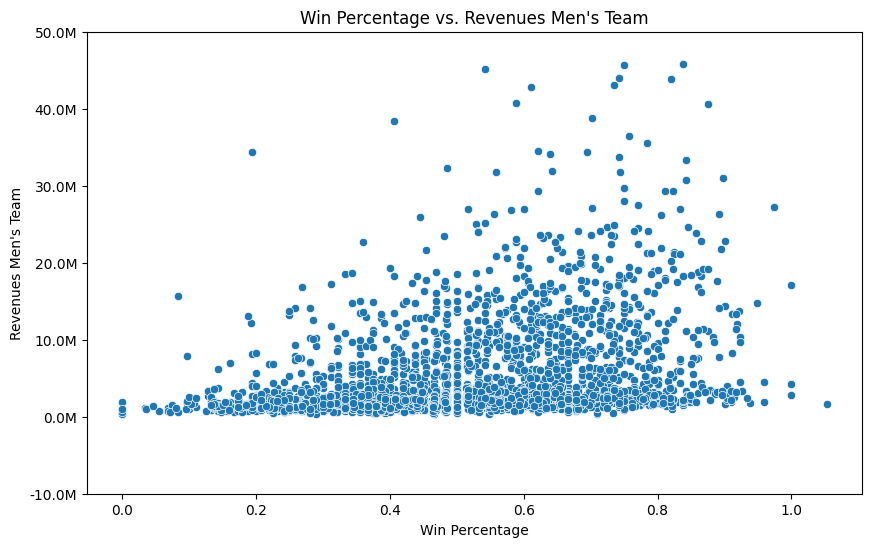

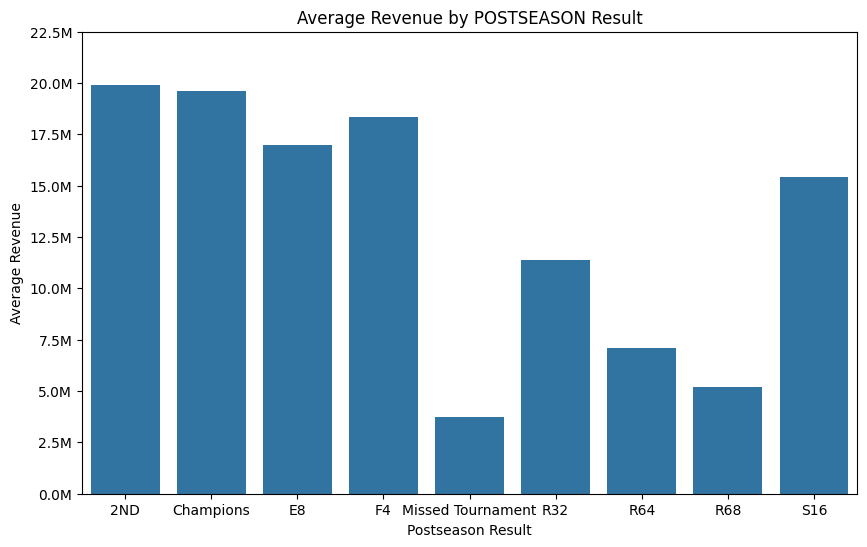

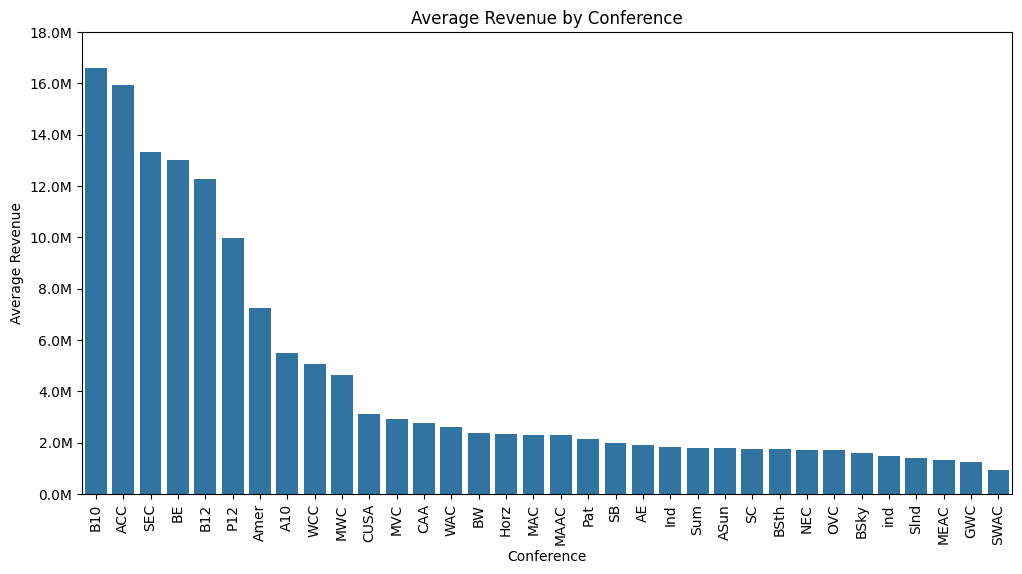

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of 'Revenues Men's Team'
plt.figure(figsize=(10, 8))
sns.histplot(df["Revenues Men's Team"], bins=30, kde=True)
plt.title("Distribution of Revenues Men's Team")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

# Histogram of 'log_revenue'
plt.figure(figsize=(10, 8))
df['log_revenue'] = np.log(df["Revenues Men's Team"])
sns.histplot(df['log_revenue'], bins=30, kde=True)
plt.title("Distribution of Log Revenue")
plt.xlabel("Log Revenue")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['W', 'Win Percentage', "Revenues Men's Team"]].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Scatterplot between 'Win Percentage' and 'Revenues Men's Team'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Win Percentage', y="Revenues Men's Team")
plt.title("Win Percentage vs. Revenues Men's Team")
plt.xlabel('Win Percentage')
plt.ylabel('Revenues Men\'s Team')
# Format y-axis in millions
plt.yticks([x for x in plt.gca().get_yticks()], [f'{x/1e6:.1f}M' for x in plt.gca().get_yticks()])
plt.show()

# Grouping by 'POSTSEASON' and analyzing average revenue
postseason_revenue = df.groupby('POSTSEASON')["Revenues Men's Team"].mean()

# Bar plot for postseason vs revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=postseason_revenue.index, y=postseason_revenue.values)
plt.title("Average Revenue by POSTSEASON Result")
plt.xlabel("Postseason Result")
plt.ylabel("Average Revenue")
# Format y-axis in millions
plt.yticks([x for x in plt.gca().get_yticks()], [f'{x/1e6:.1f}M' for x in plt.gca().get_yticks()])
plt.show()

# Grouping by 'CONF' and calculating average revenue
conference_revenue = df.groupby('CONF')["Revenues Men's Team"].mean().sort_values(ascending=False)

# Bar plot for revenue by conference
plt.figure(figsize=(12, 6))
sns.barplot(x=conference_revenue.index, y=conference_revenue.values)
plt.title("Average Revenue by Conference")
plt.xlabel("Conference")
plt.ylabel("Average Revenue")
# Format y-axis in millions
plt.yticks([x for x in plt.gca().get_yticks()], [f'{x/1e6:.1f}M' for x in plt.gca().get_yticks()])
plt.xticks(rotation=90)
plt.show()


In [154]:
# use one hot encoding for Conferences
df1 = pd.get_dummies(df, columns=['CONF'], drop_first=True)
df1.head()

,TEAM,G,W,POSTSEASON,YEAR,Revenues Men's Team,Win Percentage,CONF_ACC,CONF_AE,CONF_ASun,...,CONF_Pat,CONF_SB,CONF_SC,CONF_SEC,CONF_SWAC,CONF_Slnd,CONF_Sum,CONF_WAC,CONF_WCC,CONF_ind
0,North Carolina,40,33,2ND,2016,21408475,0.825000,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Wisconsin,40,36,2ND,2015,22808750,0.900000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Michigan,40,33,2ND,2018,21114322,0.825000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Texas Tech,38,31,2ND,2019,12123903,0.815789,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Gonzaga,39,37,2ND,2017,14723219,0.948718,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [155]:
# Check for missing values
missing_values = df1.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 TEAM                   0
G                      0
W                      0
POSTSEASON             0
YEAR                   0
Revenues Men's Team    0
Win Percentage         0
CONF_ACC               0
CONF_AE                0
CONF_ASun              0
CONF_Amer              0
CONF_B10               0
CONF_B12               0
CONF_BE                0
CONF_BSky              0
CONF_BSth              0
CONF_BW                0
CONF_CAA               0
CONF_CUSA              0
CONF_GWC               0
CONF_Horz              0
CONF_Ind               0
CONF_MAAC              0
CONF_MAC               0
CONF_MEAC              0
CONF_MVC               0
CONF_MWC               0
CONF_NEC               0
CONF_OVC               0
CONF_P12               0
CONF_Pat               0
CONF_SB                0
CONF_SC                0
CONF_SEC               0
CONF_SWAC              0
CONF_Slnd              0
CONF_Sum               0
CONF_WAC               0
CONF_WCC               0
CONF_ind

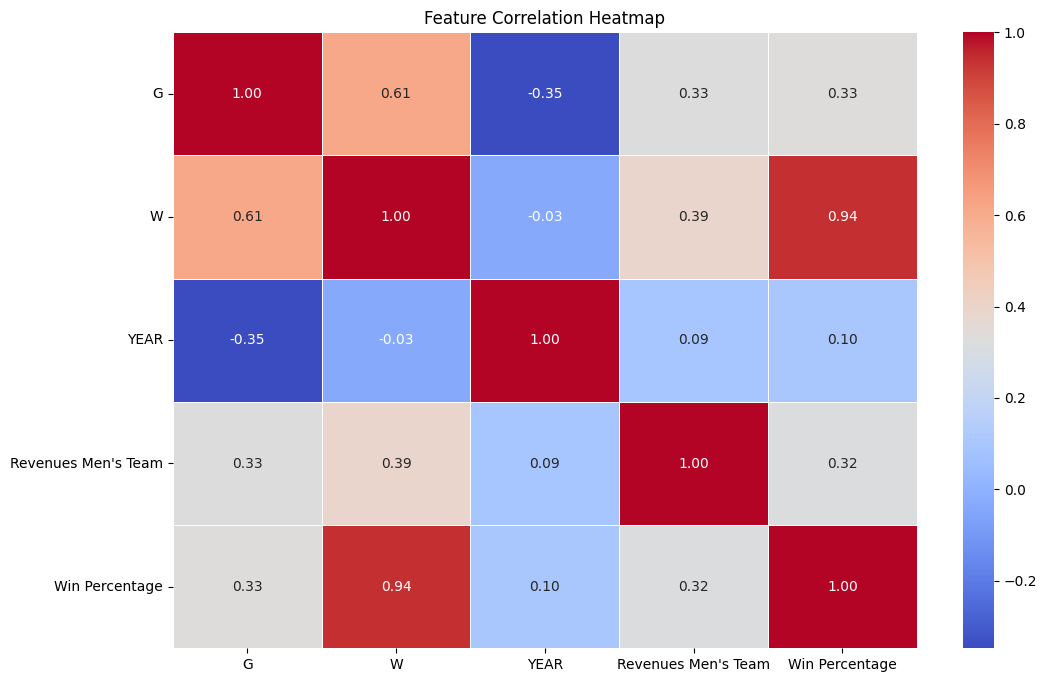

In [156]:
# Select only the numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


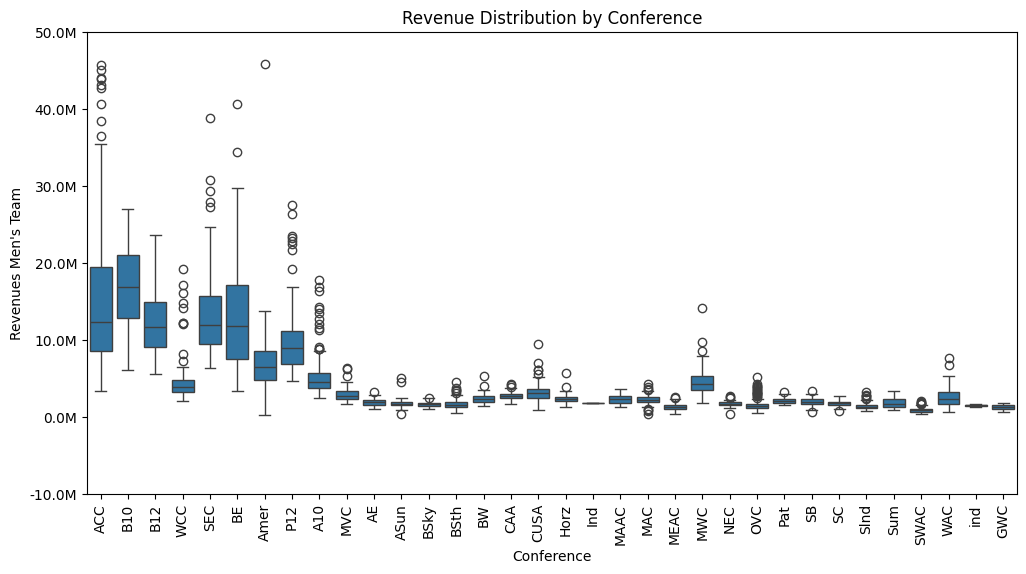

In [157]:
# Boxplot for revenue distribution by conference
plt.figure(figsize=(12, 6))
sns.boxplot(x='CONF', y="Revenues Men's Team", data=df)
plt.title("Revenue Distribution by Conference")
plt.xlabel("Conference")
plt.ylabel("Revenues Men's Team")
plt.xticks(rotation=90)
plt.yticks([x for x in plt.gca().get_yticks()], [f'{x/1e6:.1f}M' for x in plt.gca().get_yticks()])
plt.show()


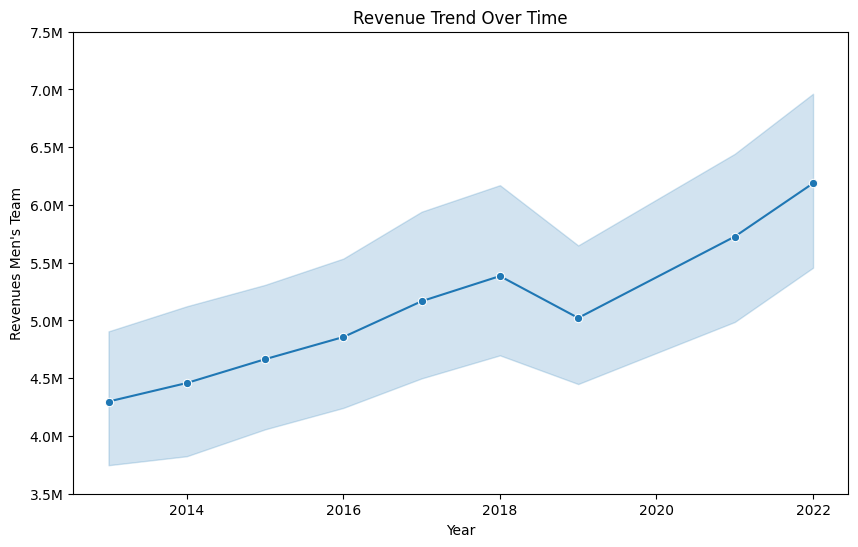

In [158]:
# Revenue trend over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='YEAR', y="Revenues Men's Team", marker="o")
plt.title("Revenue Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Revenues Men's Team")
plt.yticks([x for x in plt.gca().get_yticks()], [f'{x/1e6:.1f}M' for x in plt.gca().get_yticks()])
plt.show()


In [159]:
# drop G and W columns
df1 = df1.drop(['G', 'W'], axis=1)
df1.head()


,TEAM,POSTSEASON,YEAR,Revenues Men's Team,Win Percentage,CONF_ACC,CONF_AE,CONF_ASun,CONF_Amer,CONF_B10,...,CONF_Pat,CONF_SB,CONF_SC,CONF_SEC,CONF_SWAC,CONF_Slnd,CONF_Sum,CONF_WAC,CONF_WCC,CONF_ind
0,North Carolina,2ND,2016,21408475,0.825000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Wisconsin,2ND,2015,22808750,0.900000,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Michigan,2ND,2018,21114322,0.825000,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,Texas Tech,2ND,2019,12123903,0.815789,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Gonzaga,2ND,2017,14723219,0.948718,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [160]:
from sklearn.model_selection import train_test_split

# define features and target
X = df1.drop(columns=["Revenues Men's Team", "TEAM"])  # Exclude target and identifiers
y = df1["Revenues Men's Team"]  # Target variable

# split into training and test sets 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# merge training data back together 
df2 = X_train.copy()
df2['Revenues Men\'s Team'] = y_train

# merge test data back together
df2_test = X_test.copy()
df2_test['Revenues Men\'s Team'] = y_test


In [161]:
# map postseason success to numerical values
postseason_map = {
    'Missed Tournament': 0,
    'R68': 1,
    'R64': 2,
    'R32': 3,
    'S16': 4,
    'E8': 5,
    'F4': 6,
    '2ND': 7,
    'Champions': 8
}

# Apply the mapping to the POSTSEASON column
df2['POSTSEASON'] = df2['POSTSEASON'].map(postseason_map)
df2_test['POSTSEASON'] = df2_test['POSTSEASON'].map(postseason_map)

# check for null values in POSTSEASON
print(df2['POSTSEASON'].isnull().sum())
print(df2_test['POSTSEASON'].isnull().sum())

# Apply log transformation to target variable (add 1 to avoid log(0))
df2['log_revenue'] = np.log1p(df2["Revenues Men's Team"])
df2_test['log_revenue'] = np.log1p(df2_test["Revenues Men's Team"])

# Check the transformed data
df2_test[["Revenues Men's Team", 'log_revenue']].head()


0
0


,Revenues Men's Team,log_revenue
2764,1068356,13.881633
2270,2057901,14.537198
1993,23434825,16.969734
2462,23287417,16.963424
2130,9891222,16.107158


In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# drop target variable before splitting
X = df2.drop(columns=["Revenues Men's Team","log_revenue",]) 
y = df2["log_revenue"]

# split into training and validation sets 80/20
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on validation set
y_pred = lr.predict(X_val)

# Evaluate the model
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)

print("Validation RMSE:", rmse_val)
print("Validation R-squared:", r2_val)


Validation RMSE: 0.30502783365447955
Validation R-squared: 0.8740591778782062


In [168]:
from sklearn.ensemble import RandomForestRegressor

# create and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# predict on validation set
y_rf_pred = rf.predict(X_val)

# Evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_val, y_rf_pred))
r2_rf = r2_score(y_val, y_rf_pred)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R-squared:", r2_rf)


Random Forest RMSE: 0.36765824762550264
Random Forest R-squared: 0.8170315499692501


In [169]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Set up Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 5-fold cross-validation with negative mean squared error
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Convert negative MSE to RMSE and calculate mean RMSE across folds on the log scale
cv_rmse_log = np.sqrt(-cv_scores)


# Print the results
print("Cross-validated RMSE for each fold:", cv_rmse_log)
print("Mean Cross-validated RMSE :", np.mean(cv_rmse_log))



Cross-validated RMSE for each fold: [0.38033055 0.41692402 0.36217634 0.38995863 0.38996318]
Mean Cross-validated RMSE : 0.3878705429868868


In [166]:
from xgboost import XGBRegressor

# Create and train the XGBoost model
xgb = XGBRegressor(random_state=42, n_estimators=200)
xgb.fit(X_train, y_train)

# Predict on validation set
y_xgb_pred = xgb.predict(X_val)

# Evaluate the model performance
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_xgb_pred))
r2_xgb = r2_score(y_val, y_xgb_pred)

print("XGBoost RMSE:", rmse_xgb)
print("XGBoost R-squared:", r2_xgb)


XGBoost RMSE: 0.3764447543649971
XGBoost R-squared: 0.8081816800658003


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Prepare the data excluding target and team
X = df2.drop(columns=["Revenues Men's Team", "log_revenue"])  
y = df2["log_revenue"]  

# Create the Linear Regression model
lr = LinearRegression()

# Perform 5-fold cross-validation and evaluate on RMSE (log scale)
cv_rmse = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to RMSE and print the results
cv_rmse = np.sqrt(-cv_rmse)

print("Cross-validated RMSE (Log Scale):", cv_rmse)
print("Mean Cross-validated RMSE (Log Scale):", np.mean(cv_rmse))


Cross-validated RMSE (Log Scale): [0.3168443  0.34957485 0.31803103 0.32494104 0.33326827]
Mean Cross-validated RMSE (Log Scale): 0.32853189856232035


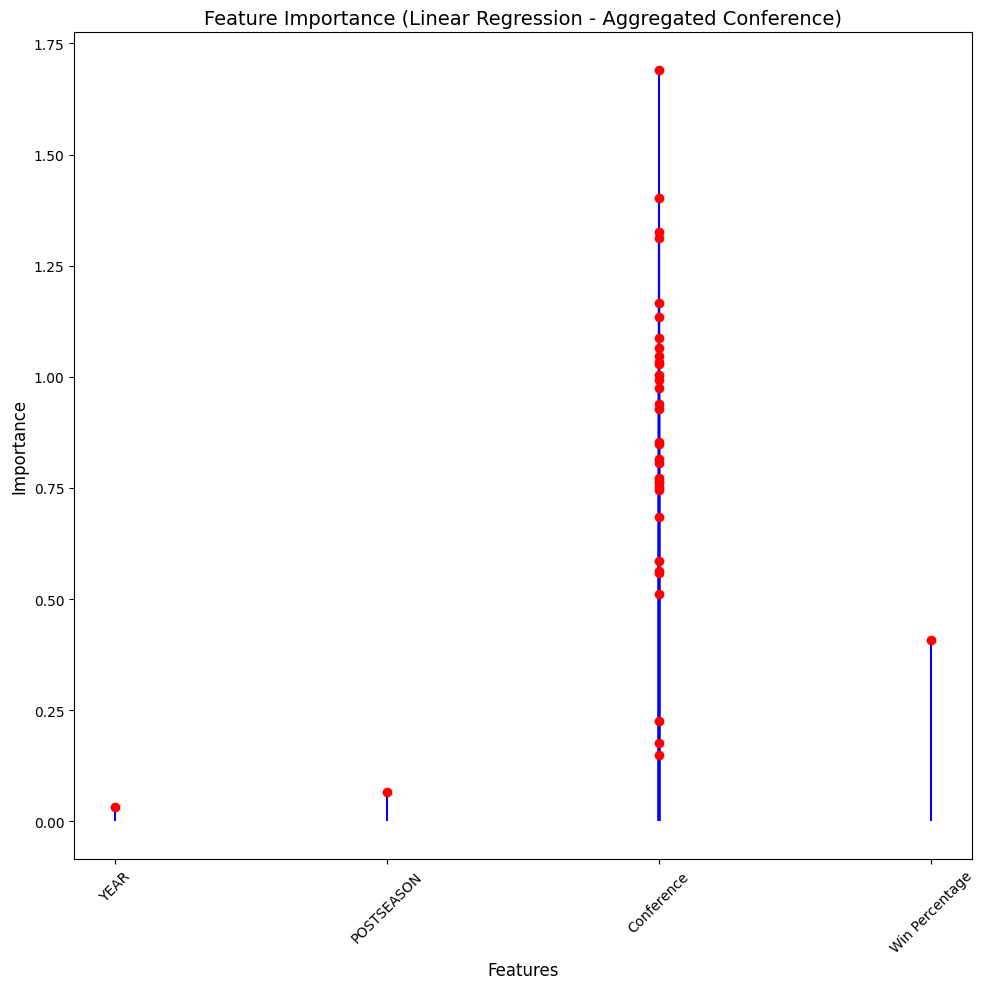

In [176]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data 
X = df2.drop(columns=["Revenues Men's Team", "log_revenue"])  # Features (no target)
y = df2["log_revenue"]  # Log-transformed target: revenue

# Train the Linear Regression model
lr = LinearRegression()
lr.fit(X, y)

# Get the coefficients (importance) of each feature
coefficients = lr.coef_

# Create a list of feature names (replace with actual feature names from your dataset)
feature_names = X.columns

# Find all conference columns (assuming they start with 'Conference_')
conference_columns = [col for col in feature_names if 'CONF_' in col]

# Aggregate the importance of the conference columns
conference_importance = np.sum(np.abs(coefficients[np.isin(feature_names, conference_columns)]))

# Remove the individual conference columns from the importance array
importance = np.abs(coefficients)

# Create a new feature called 'Conference' and assign the aggregated importance
new_feature_names = [name if name not in conference_columns else 'Conference' for name in feature_names]
new_importance = [conference_importance if name == 'Conference' else imp for name, imp in zip(feature_names, importance)]

# Sort the features based on their importance
sorted_idx = np.argsort(new_importance)
sorted_features = np.array(new_feature_names)[sorted_idx]
sorted_importance = np.array(new_importance)[sorted_idx]

# Plot the feature importance 
fig, ax = plt.subplots(figsize=(10, 10))
ax.stem(sorted_features, sorted_importance, basefmt=" ", markerfmt='ro', linefmt='b-', orientation='vertical')

# Title and labels
ax.set_title("Feature Importance (Linear Regression - Aggregated Conference)", fontsize=14)
ax.set_xlabel("Features", fontsize=12)
ax.set_ylabel("Importance", fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


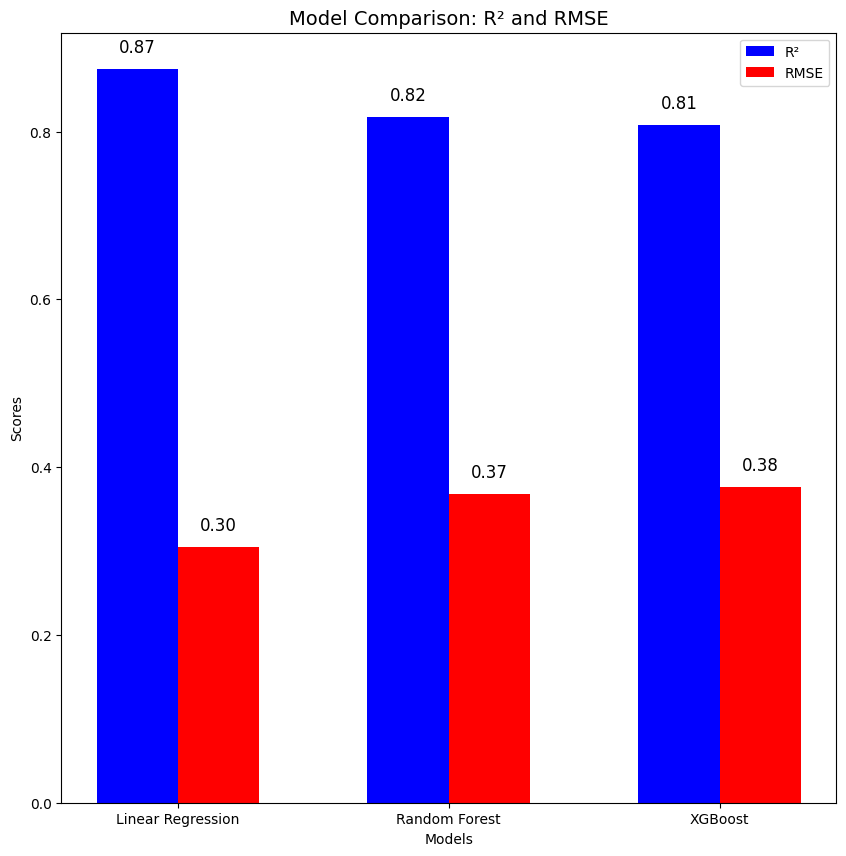

In [177]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation data for RMSE and R (replace with actual values)
models = ['Linear Regression', 'Random Forest', 'XGBoost']
r2_values = [0.8741, 0.8170, 0.8082]  
rmse_values = [0.3050, 0.3677, 0.3764]  

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Bar width for each model's metrics
width = 0.3
x = np.arange(len(models))  # x positions for the models

# Plot RMSE and R² for each model, side-by-side
ax.bar(x - width / 2, r2_values, width, label="R²", color='b')  # R² bars in blue
ax.bar(x + width / 2, rmse_values, width, label="RMSE", color='r')  # RMSE bars in red (change made here)

# Adding values on top of the bars
for i, model in enumerate(models):
    ax.text(i - width / 2, r2_values[i] + 0.02, f'{r2_values[i]:.2f}', ha='center', fontsize=12, color='black')
    ax.text(i + width / 2, rmse_values[i] + 0.02, f'{rmse_values[i]:.2f}', ha='center', fontsize=12, color='black')

# Labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: R² and RMSE', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()
